### Data Reduction Steps

- **Remove unnecessary columns**  
  - Drop columns like `customerID` that do not provide predictive value.

- **Reduce redundancy**  
  - Remove low-variance and highly correlated features to simplify the dataset.

- **Create meaningful features**  
  - Example: `AvgMonthlySpend` calculated from `TotalCharges` and `tenure`.

- **Reduce dataset size while preserving churn distribution**  
  - Apply stratified sampling (80% of rows) to maintain class balance.

- **Save the final reduced dataset**  
  - Export the processed dataset for modeling and analysis.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [46]:
df = pd.read_csv("03.transformed_telco_data.csv")
print("transformed data:", df.shape)
df.head()

transformed data: (70000, 49)


,customerID,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-Month,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Unknown,TechSupport_Yes,StreamingTV_No,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Unknown,StreamingMovies_Yes
0,CUST00001,0.0,-1.244974,True,False,0.034155,0.000306,1,True,False,...,False,True,False,False,True,False,False,True,False,False
1,CUST00002,1.0,-1.307522,True,True,0.003476,0.000069,0,False,True,...,False,False,False,True,False,True,False,True,False,False
2,CUST00003,0.0,1.194413,True,False,0.016622,0.002662,1,True,False,...,False,False,True,False,False,False,True,False,False,True
3,CUST00004,0.0,1.069316,True,False,0.038495,0.004463,0,True,False,...,True,True,False,False,True,False,False,True,False,False
4,CUST00005,1.0,-0.369296,True,True,0.002956,0.000566,1,False,False,...,True,True,False,False,True,False,False,True,False,False


In [47]:

# selector = VarianceThreshold(threshold=0.01)  
# selector.fit(df.select_dtypes(include=[np.number]))

# low_variance_features = df.select_dtypes(include=[np.number]).columns[~selector.get_support()]
# print("Low-variance features dropped:", list(low_variance_features))

# df = df.drop(columns=low_variance_features)
# print("Shape after variance filtering:", df.shape)

# !this will some important features like MonthlyCharges and TotalCharges
# So, we will not use variance thresholding here.


In [48]:
# List the columns you must keep
essential_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Filter the DataFrame to check only the *other* numerical columns
cols_to_check = df.select_dtypes(include=[np.number]).columns.difference(essential_cols)

selector = VarianceThreshold(threshold=0.01) 
selector.fit(df[cols_to_check])

low_variance_features = cols_to_check[~selector.get_support()]
print("Low-variance features dropped:", list(low_variance_features))

# Only drop the features that are NOT in your essential list
df = df.drop(columns=low_variance_features)

Low-variance features dropped: []


In [49]:
df

,customerID,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-Month,Contract_One year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Unknown,TechSupport_Yes,StreamingTV_No,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Unknown,StreamingMovies_Yes
0,CUST00001,0.0,-1.244974,True,False,0.034155,0.000306,1,True,False,...,False,True,False,False,True,False,False,True,False,False
1,CUST00002,1.0,-1.307522,True,True,0.003476,0.000069,0,False,True,...,False,False,False,True,False,True,False,True,False,False
2,CUST00003,0.0,1.194413,True,False,0.016622,0.002662,1,True,False,...,False,False,True,False,False,False,True,False,False,True
3,CUST00004,0.0,1.069316,True,False,0.038495,0.004463,0,True,False,...,True,True,False,False,True,False,False,True,False,False
4,CUST00005,1.0,-0.369296,True,True,0.002956,0.000566,1,False,False,...,True,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,CUST69996,1.0,0.443833,True,False,0.038366,0.003339,0,False,False,...,False,False,False,True,True,False,False,True,False,False
69996,CUST69997,0.0,-0.494393,True,True,0.015299,0.000907,1,True,False,...,False,True,False,False,True,False,False,True,False,False
69997,CUST69998,0.0,-0.181651,True,True,0.007720,0.000876,0,True,False,...,False,True,False,False,False,True,False,True,False,False
69998,CUST69999,0.0,-0.119103,True,True,0.019416,0.001460,0,True,False,...,False,True,False,False,False,False,True,True,False,False


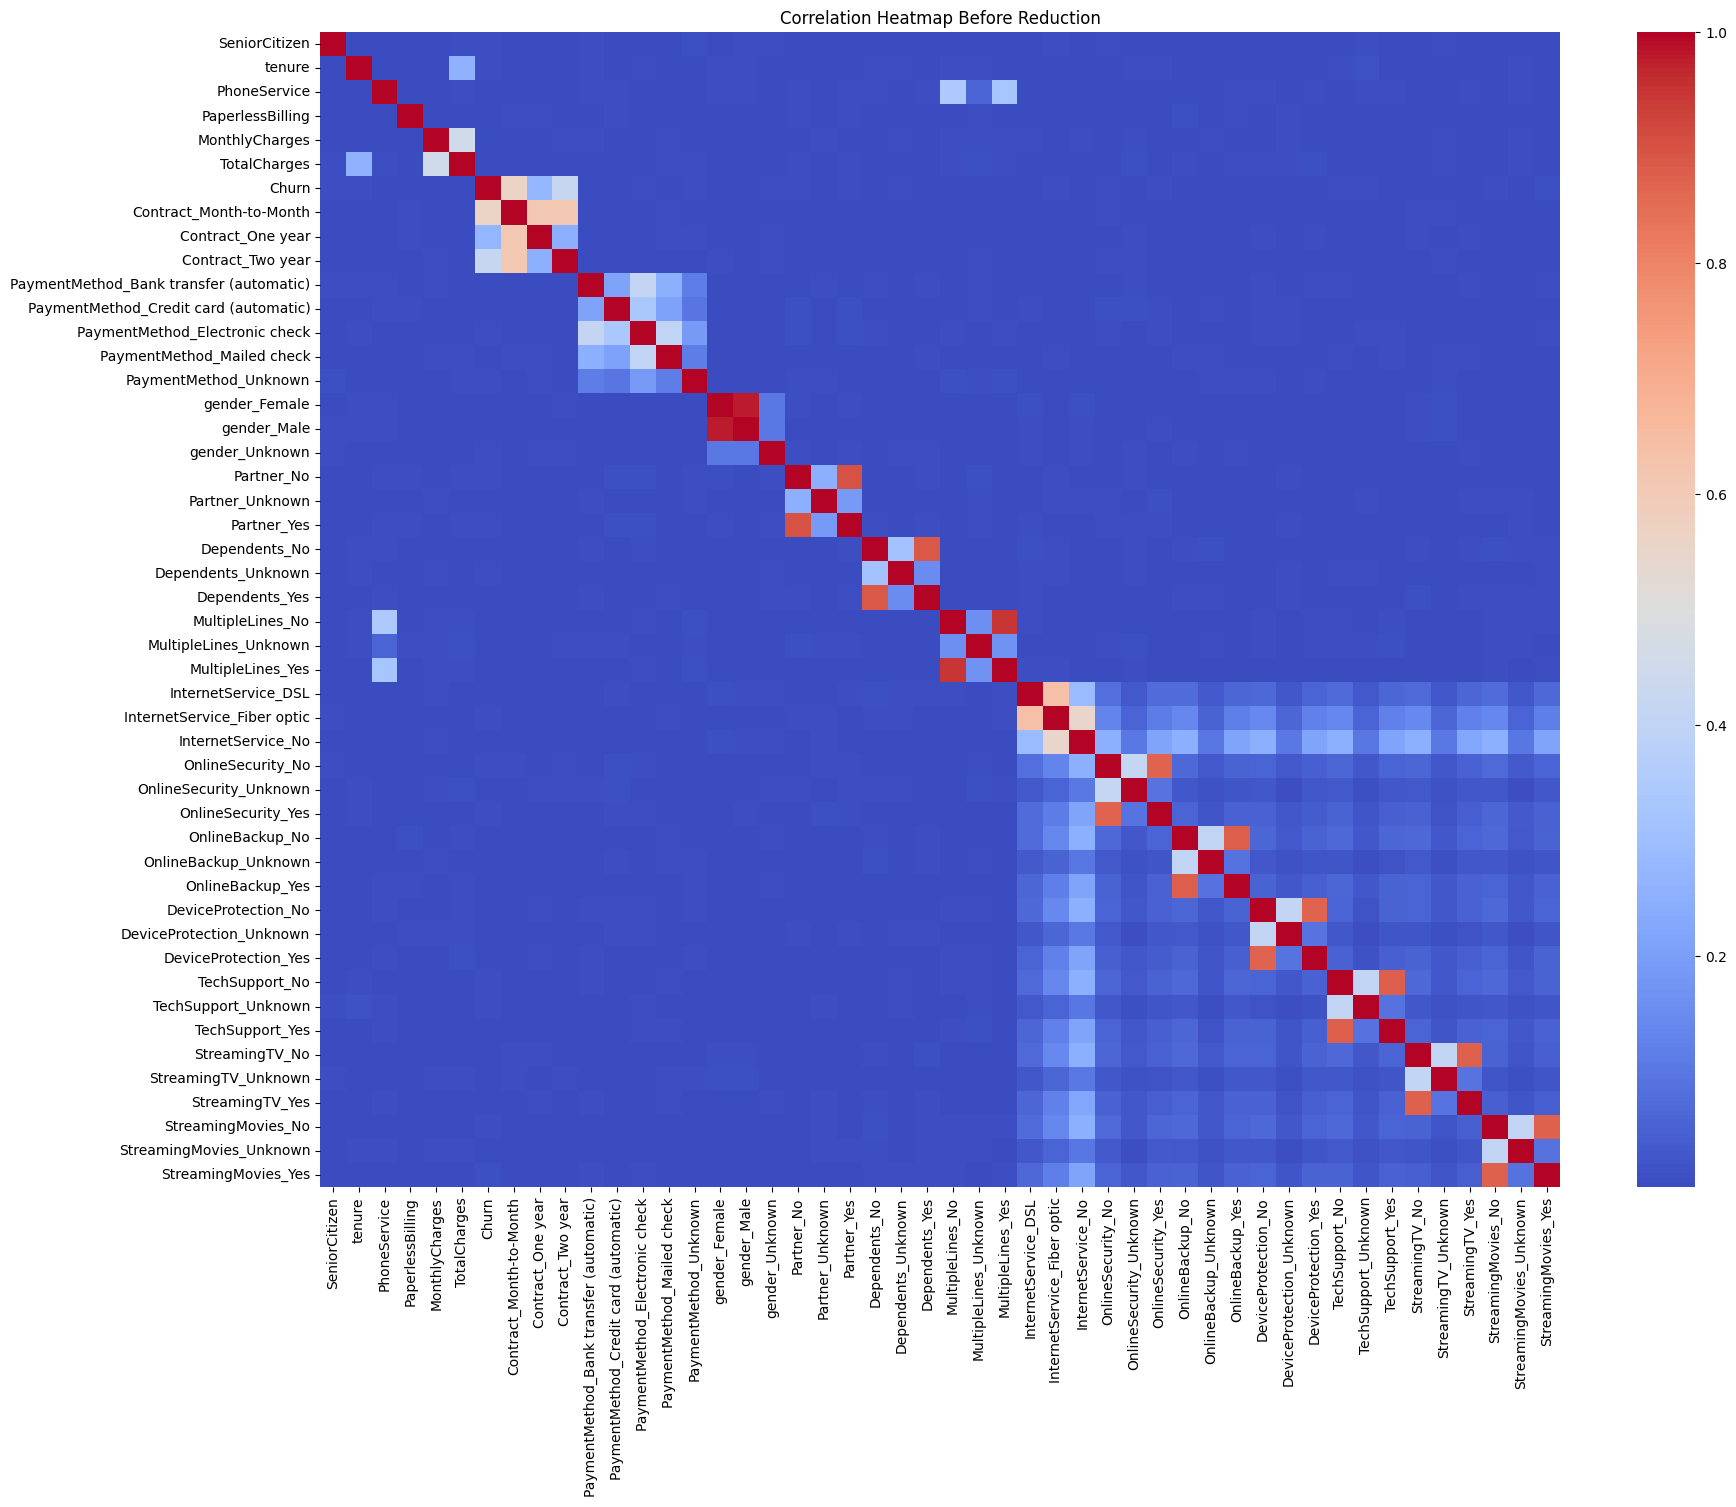

Highly correlated features dropped: ['gender_Male']
Shape after correlation filtering: (70000, 48)


In [50]:
#  Drop highly correlated features 
corr_matrix = df.select_dtypes(include=[np.number,np.bool]).corr().abs()


plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap Before Reduction")
plt.show()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated features dropped:", to_drop)

df = df.drop(columns=to_drop)
print("Shape after correlation filtering:", df.shape)


How Gender Information is Still Retained

Crucially, the gender information is not lost; it is just represented in a more efficient, non-redundant way by the remaining gender columns:

| Remaining Gender Column(s) | Role | 
|----------|----------|
| gender_Female (Kept)   | Indicates if the customer is female (1) or not (0).   |
| gender_Unknown (Kept, if it existed)    | Indicates if the gender value was missing/unknown (1) or not (0).  |
| Implied Category    | If both gender_Female and gender_Unknown are 0, the model correctly infers the customer is Male.  |


The removal of the redundant gender_Male column is a successful preprocessing step that prevents multicollinearity (redundancy) without losing any predictive information. Your MLPClassifier will train efficiently using the remaining 47 features.


In [51]:
# # create new feature average monthly spend and remove total charge 
# df["AvgMonthlySpend"] = df["TotalCharges"] / df["tenure"].replace(0, np.nan)


# corr_before = df[["tenure", "MonthlyCharges", "TotalCharges", "AvgMonthlySpend"]].corr()
# print("Correlation matrix (before dropping TotalCharges):")
# print(corr_before)

# plt.figure(figsize=(6,4))
# sns.heatmap(corr_before, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
# plt.title("Correlation Before Dropping TotalCharges")
# plt.show()


# df = df.drop(columns=["TotalCharges"])


# corr_after = df[["tenure", "MonthlyCharges", "AvgMonthlySpend"]].corr()
# print("\nCorrelation matrix (after dropping TotalCharges):")
# print(corr_after)

# plt.figure(figsize=(6,4))
# sns.heatmap(corr_after, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
# plt.title("Correlation After Dropping TotalCharges")
# plt.show()


# print("\nPreview after dropping TotalCharges:")
# print(df[["tenure", "MonthlyCharges", "AvgMonthlySpend"]].head())


In [52]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# List the crucial continuous features that must be kept
essential_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 1. Select all numerical columns (including bools from one-hot encoding)
all_numerical_cols = df.select_dtypes(include=[np.number, np.bool]).columns

# 2. Select the columns to check (all numerical minus the essential ones)
cols_to_check = all_numerical_cols.difference(essential_cols) 

# 3. Apply the selector (threshold=0.01)
selector = VarianceThreshold(threshold=0.01) 
selector.fit(df[cols_to_check])

# 4. Identify the low-variance features to drop
low_variance_features = cols_to_check[~selector.get_support()]

# Print the dropped features
print("--- Variance Threshold Filtering ---")
print("Low-variance features dropped:", list(low_variance_features)) 

# 5. Drop the features from the DataFrame
df = df.drop(columns=low_variance_features)
print("Shape after variance filtering:", df.shape)

--- Variance Threshold Filtering ---
Low-variance features dropped: []
Shape after variance filtering: (70000, 48)


~~**Reason:**  
`AvgMonthlySpend` is better than `TotalCharges` because it shows the customer’s **average spending per month**, independent of **tenure**, while `TotalCharges` is **cumulative** and highly correlated with tenure, which can be misleading for **new or short-tenure customers**.~~

***`MonthlyCharges and TotalCharges are two of the most significant numerical features in most churn datasets.`***


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               70000 non-null  object 
 1   SeniorCitizen                            70000 non-null  float64
 2   tenure                                   70000 non-null  float64
 3   PhoneService                             70000 non-null  bool   
 4   PaperlessBilling                         70000 non-null  bool   
 5   MonthlyCharges                           70000 non-null  float64
 6   TotalCharges                             70000 non-null  float64
 7   Churn                                    70000 non-null  int64  
 8   Contract_Month-to-Month                  70000 non-null  bool   
 9   Contract_One year                        70000 non-null  bool   
 10  Contract_Two year                        70000

In [54]:

# Remove customerID 
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

In [55]:

#  Numerosity reduction: stratified sampling (80% of rows)
df_reduced = (
    df.groupby('Churn', group_keys=False)
      .sample(frac=0.8, random_state=42)
      .reset_index(drop=True)
)


In [56]:
# change data to int64 because if not its not going to work with mlp classifier
not_to_int_cols = ['tenure','MonthlyCharges','TotalCharges']

for cols in df_reduced:
    if cols not in not_to_int_cols:
        df_reduced[cols] = df_reduced[cols].astype(int)

In [57]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            56000 non-null  int64  
 1   tenure                                   56000 non-null  float64
 2   PhoneService                             56000 non-null  int64  
 3   PaperlessBilling                         56000 non-null  int64  
 4   MonthlyCharges                           56000 non-null  float64
 5   TotalCharges                             56000 non-null  float64
 6   Churn                                    56000 non-null  int64  
 7   Contract_Month-to-Month                  56000 non-null  int64  
 8   Contract_One year                        56000 non-null  int64  
 9   Contract_Two year                        56000 non-null  int64  
 10  PaymentMethod_Bank transfer (automatic)  56000

**Why:** The original dataset has 70,000 rows. We apply stratified numerosity reduction to **reduce the dataset size** for faster processing and modeling, while **preserving the proportion of churn classes** to avoid introducing bias.


In [58]:
df_reduced.to_csv("04.reduced_telco_data.csv", index=False)
print("Reduced dataset saved as 04.reduced_telco_data.csv")

Reduced dataset saved as 04.reduced_telco_data.csv
